# PROJET FORCES DE PRESSIONS SUR LA DIGUE

## I. Introduction

Dans ce mini-projet nous allons calculer numériquement les forces de pression appliquées à une digue de forme arbitraire. L'objectif sera de déterminer si ces forces sont trop importantes pour la digue, ce qui engendrerait une rupture de l'équilibre statique.
Nous considérons la situation suivante :

![Digue.png](./Digue.png)

![DigueSchema.png](./DigueSchema.png)

## II. Représentation et lois physiques

Pour considérer une digue de forme arbitraire, on modélise les pentes côté air et côté eau par des fonctions mathématiques. Dans ce projet nous allons intégrer des fonctions suivant la direction donnée par l'axe vertical $y$. Il sera donc plus pratique de définir les pentes de la digue comme étant $x$ en fonction de $y$ (illustré ci-dessus).

La digue que nous modélissons est un bloc de béton posé sur le sol rocheux. D'un côté la digue retient une masse d'eau de hauteur $H$, l'autre côté étant exposé à l'air. On prend $H=10$ m dans toute la suite. 

Pour simplifier, on considèrera le problème en 2 dimensions : la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction.

Pour formuler les équations d'équilibre statique de la digue, nous appliquons le PFD que nous projetons ensuite sur les axes:

Forces: 

-poids $P$ de la digue, dirigé selon $-\vec{e_y}$ et de norme $P=mg$. 

-pression de l'eau $P_{eau}$. En tout point de $[H,x_e]$, cette force est normale à la pente, et sa norme de la composante $y$ de la pression est $P_{eau}(y)=P_0+\rho g h$ avec $P_0=0$ puisqu'on néglige la pression atmosphérique. 

-force de frottement statique $\vec{f}$, dirigée selon $\vec{e_x}$ de composante tangentielle $T$ et normale $N$. 

Principe fondamental de la dynamique :
> $\vec{P}+\vec{F_{eau}}+\vec{f}=\vec{0}$

De plus, l'énoncé fournit le calcul pour la force de pression exercée par l'eau :
> $\vec{F_{eau}} =\int_0^H P(y) \mathrm{d}l . \vec{n}$ avec $\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}$ et $\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} $

## III. Modélisation numérique : Digues affines

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import inspect #ce module nous servira à connaître le nombre d'argument que prend en entrée une fonction

On affiche les courbes représentant la digue. On commence par initaliser les paramètres important: la hauteur de la digue H et sa largeur entre xa et xe.

In [100]:
H = 10
xa = -5
xe = +5

On définit les fonctions côté eau et côté air. Dans un premier temps, prenons $f_{air}$ et $f_{eau}$ deux fonctions affines. En particulier, $f_{air}(y) = -\frac{x_a}{H}.(y-H)$ et $f_{eau}(y) = -\frac{x_e}{H}.(y-H)$.

In [101]:
def fair(y, x_a = xa, H = H, d=None, e=None):
    return -(y - H) * x_a / H

def feau(y, x_e = xe, H = H, d=None, e=None):
    return   -(y - H) * x_e / H
# On définit 5 paramètres dont 2 inutiles sur ces fonctions afin que le module `inspect` les reconnaissent et qu'elles varient avec xa et xe

On affiche la forme de la digue dans le plan (Oxy).

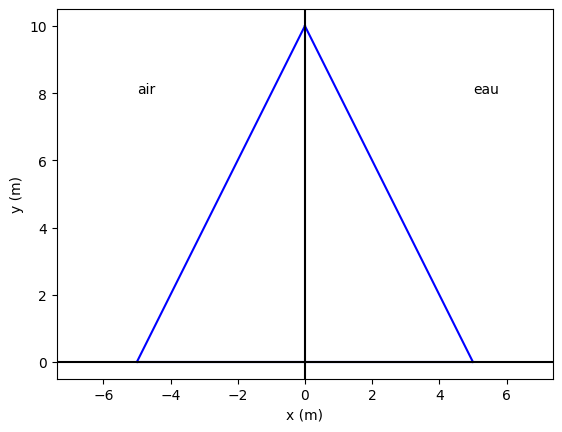

In [102]:
y = np.linspace(0, H, 1000)

plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)')  
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

Afin de calculer la surface de la digue, utile pour le poids notamment, on utilise la fonction qui calcule l'intégrale à partir de la méthode des points milieux. On utilise ici le module `inspect` et l'argument `x_a_ou_e` afin d'adapter la dépendance en xa ou xe des fonctions; certaines n'en dépendent pas tandis que d'autres si. Ce sera utile surtout pour la suite, lorsque l'on fera varier les paramètres xa et xe.

In [103]:
def int_point_milieu(f, a, b, x_a_ou_e = None, n = 1000):
    _delta_x = (b-a)/n
    _integrale = 0
     
    # On vérifie si la fonction f accepte le paramètre x_a_ou_e
    signature = inspect.signature(f)
    if len(signature.parameters) == 5:
        # Si f a 5 paramètres, on reconnait feau et fair qui dépendent de la valeur de xe ou xa
        for i in range(n):
            x_i = a + (i + 1/2) * _delta_x
            y_i = f(x_i, x_a_ou_e) * _delta_x
            _integrale += y_i
    else :
        for i in range(n):
            x_i = a + (i+1/2)*_delta_x
            y_i = f(x_i) * _delta_x
            _integrale += y_i
    return _integrale

In [105]:
# On calcule la surface de la digue dans le plan(Oxy)
def surface_digue(fair, feau, x_a = xa, x_e = xe, H = 10):
    """cette fonction renvoie aussi le volume car la profondeur de la digue (selon l'axe z) est de 1m
    et on néglige les effets de bord"""
    _surface_côté_eau = np.abs(int_point_milieu(feau, 0, H, x_e))
    _surface_côté_air = np.abs(int_point_milieu(fair, 0, H, x_a))
    #valeur absolue car l'intégrale peut être négative
    return _surface_côté_eau + _surface_côté_air

print(f'le volume de la digue est {surface_digue(fair, feau):.4} m^3')
print(f'La surface de la digue dans le plan (Oxy) est de {surface_digue(fair, feau):.4} m²')

#on a la même valeur en m^3 ou en m² car la profondeur de la digue suivant l'axe z (perpendiculaire au plan du graphique) est de 1m

le volume de la digue est 50.0 m^3
La surface de la digue dans le plan (Oxy) est de 50.0 m²


On calcule le poids de la digue à partir de son volume et de la masse volumique du béton.

In [106]:
rho = 3000 # en kg/m^3
rho_eau = 1000 # en kg/m^3
p_atm = 101325 # en P
L = 1 # en m
g = 9.81 # en m/s²

# On calcule le poids selon y
masse = rho*surface_digue(fair, feau)*L
poids = -masse*g

print(f"La masse de la digue vaut {masse:.0f} m^3")
print(f"La norme du poids est donc de {np.abs(poids):.0f} N")

La masse de la digue vaut 150000 m^3
La norme du poids est donc de 1471500 N


Une fois le poids $\vec{P}$ de la digue déterminé, on peut calculer les forces de pression de l'eau en les projetant sur les axes $x$ et $y$.

In [107]:
def pression_eau_local_ux(y, hauteur = 10):
    """renvoie la valeur de la pression, projetée selon Ux, en un point y."""
    return - rho_eau * g * (hauteur - y) 

def pression_eau_local_uy(y, x_e=xe, hauteur = 10, d=None, e=None):
    #-x_e/H correspond à la dérivée de feau dans le cas d'une fonction feau affine 
    return rho_eau * g * (hauteur - y) * - x_e / H
    
pression_eau_totale_ux = int_point_milieu(pression_eau_local_ux, 0, H)
pression_eau_totale_uy = int_point_milieu(pression_eau_local_uy, 0, H, xe)
#on intégre les valeurs locales de pression sur toute la surface

print(f"La pression projetée sur l'axe x vaut {pression_eau_totale_ux: .0f} N")
print(f"La pression projetée sur l'axe y vaut {pression_eau_totale_uy: .0f} N")

La pression projetée sur l'axe x vaut -490500 N
La pression projetée sur l'axe y vaut -245250 N


On en déduit les composantes normale et tangentielle de la force de frottement. En effet, ces composantes doivent satisfaire $\frac{T}{N}\leqslant \mu_s$, avec $\mu_s$ le coefficient de friction statique, afin que cette équation de l'équilibre statique soit vérifiée. Ici, $\mu_s$ = 0.5

In [108]:
T = -pression_eau_totale_ux
#on ne redéfinira plus T par la suite cas sa valeur est indépendante de xe et xa

N = -poids - pression_eau_totale_uy

print(f"Le rapport T/N vaut environ {T/N:.3f}.")
print(f" T = {T: .0f}, N = {N: .0f}")

if T/N < 0.5:
    print("Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.")
else : 
    print("Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.")

Le rapport T/N vaut environ 0.286.
 T =  490500, N =  1716750
Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.


On a donc $\frac{T}{N} \leqslant \mu_s$ ($\mu_s=0.5$). La digue est donc en équilibre translationnel.

Maintenant nous aimerions savoir si la digue est stable pour n'importe quelle valeur de xa et xe tant que les fonctions modélisant les parois de la digue soient des fonctions affines. Nous codons ainsi une fonction globale qui réutilise toutes celles que nous avons déjà codées.

In [109]:
def equilibre_affine(x_a, x_e):
    T = -pression_eau_totale_ux

    #on commence par effectuer les changements liés à la nouvelle définition de xe et xa
    
    #on redéfinit le poids
    masse = rho*surface_digue(fair, feau, x_a, x_e)*L
    poids = -masse*g
    
    #on redéfinit la force de pression de l'eau
    pression_eau_totale_uy = int_point_milieu(pression_eau_local_uy, 0, H, x_e)
    
    #on redéfinit la composante de la force de réaction du sol normale, la composante tangentielle ne dépend pas de xe 
    N = -poids - pression_eau_totale_uy
    
    print(f'Le rapport T/N vaut {T/N: .3f}')
    
    if T/N < 0.5:
        print("Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.")
    else : 
        print("Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.")

equilibre_affine(-5, 0)

Le rapport T/N vaut  0.667
Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.


Le rapport T/N vaut  0.500
Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.


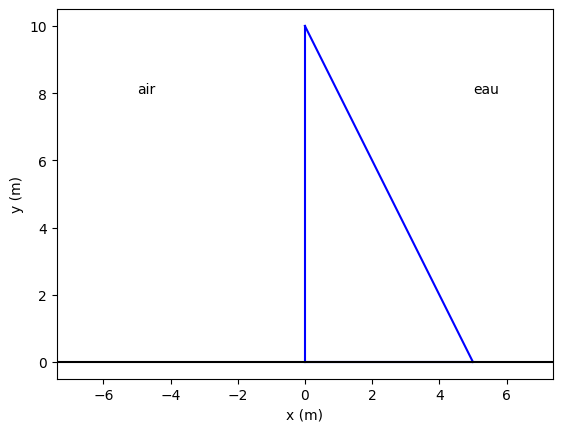

In [111]:
equilibre_affine(0, 5)
# on teste pour xa = 0 et xe = 5

plt.plot(fair(y, 5), y, '-b') 
plt.plot(feau(y, 0), y, '-b')  
 
plt.plot([5, 0], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)')  
plt.ylabel('y (m)')
plt.text(5, 8, 'eau')
plt.text(-5, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

Comme la pression de l'air est négligée, la pente du côté air n'a pas d'influence sur la résultante des forces (si ce n'est sur la surface, et donc le poids).
Nous remarquons que pour `xa`= 0 et `xe` = 5, la digue est tout juste à l'équilibre. En fait on se rend compte que la forme de la paroi n'est pas optimale. Nous allons maintenant tester avec une forme différente.

## IV. Modélisation numérique : Digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


dont la fonction dérivée est :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

Dans la suite nous prendrons $a=3$.

In [112]:
a = 3
H = 10
xa = -5
xe = +5

On redéfinit toutes les fonctions qui seront différentes pour des parois convexes

In [113]:
def feau_convexe(y, x_e=xe, c=None, d=None, e=None):
    return a * (y / H) ** 2 - (a + x_e) * (y / H) + x_e

def fair_convexe(y, x_a=xa, c=None, d=None, e=None):
    return (H - y) * x_a / H

def pression_eau_local_uy_convexe(y, x_e=xe, hauteur = 10, d=None, e=None):
    # 2*a * (y / H ** 2) - (a + x_e) / H correspond à la dérivée de feau, donc à tangente(theta) dans le cas d'une fonction feau affine
    return rho_eau * g * (hauteur - y) * (2*a * (y / H ** 2) - (a + x_e) / H)

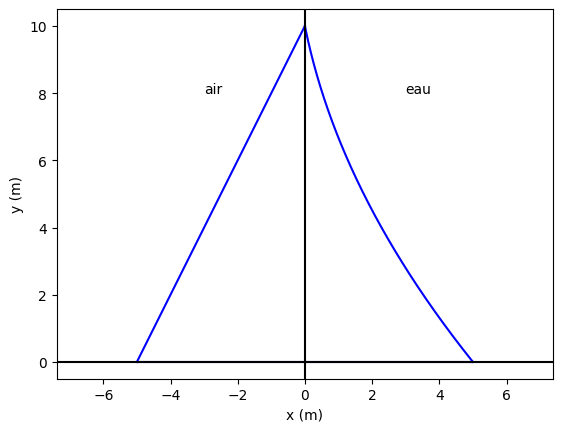

In [114]:
y = np.linspace(0, H, 1000)

plt.plot(feau_convexe(y), y, '-b')
plt.plot(fair_convexe(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

In [115]:
def equilibre_convexe(x_a, x_e, a = 3):
    T = -pression_eau_totale_ux

    #on commence par effectuer les changements liés à la nouvelle définition de xe et xa
        
    #on redéfinit le poids
    masse = rho*surface_digue(fair_convexe, feau_convexe, x_a, x_e)*L
    poids = -masse*g
    
    #on redéfinit la force de pression de l'eau
    pression_eau_totale_uy_convexe = int_point_milieu(pression_eau_local_uy_convexe, 0, H, x_e)
    
    #on redéfinit la composante de la force de réaction du sol normale, la composante tangentielle ne dépend pas de xe 
    N = -poids - pression_eau_totale_uy_convexe
    
    print(f'Le rapport T/N vaut {T/N: .3f}')
    
    if T/N < 0.5:
        print("Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.")
    else : 
        print("Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.")
    return T/N

On teste pour différentes valeurs de `xa` et `xe` en comparant avec une paroi de forme affine.

In [116]:
equilibre_convexe(0, 6)
print()

Le rapport T/N vaut  0.455
Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.



In [117]:
equilibre_convexe(0 , 6)
equilibre_affine(0, 5)

Le rapport T/N vaut  0.455
Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.
Le rapport T/N vaut  0.500
Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.


In [118]:
print(f'le volume de la digue est {surface_digue(fair, feau, 0, 5):.4} m^3')
print(f'le volume de la digue est {surface_digue(fair_convexe, feau_convexe, 0, 6):.4} m^3')

le volume de la digue est 25.0 m^3
le volume de la digue est 25.0 m^3


Dans les deux cas, la digue est en équilibre. Cependant, comme $T/N_{affine} > T/N_{convexe}$ pour le même volume ($V=25 \; m^2$), il est préférable d'utiliser la pente convexe.

Nous allons finalement tracer le rapport $T/N$ en fonction du volume. Ainsi, nous pourrons éterminer graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

Le rapport T/N vaut  0.556
Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.
Le rapport T/N vaut  0.542
Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.
Le rapport T/N vaut  0.529
Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.
Le rapport T/N vaut  0.517
Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.
Le rapport T/N vaut  0.506
Le rapport est supérieur au coefficient statique de friction roche-béton. La digue n'est pas stable.
Le rapport T/N vaut  0.495
Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.
Le rapport T/N vaut  0.484
Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est stable.
Le rapport T/N vaut  0.474
Le rapport est inférieur au coefficient statique de friction roche-béton. La digue est st

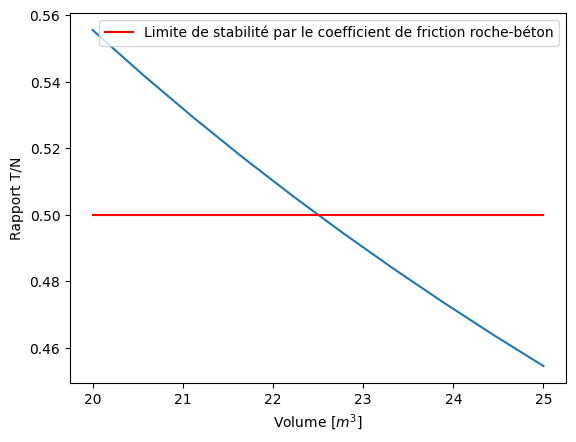

In [119]:
# Pour xe variant de 5 à 6, on calcule la valeur de T/N et du volume de la digue
x_e = np.linspace(5,6,10)
TN = np.ones(x_e.shape)
Volume = np.ones(len(x_e))

for i, x_e in enumerate(x_e):
    TN[i] = equilibre_convexe(0, x_e)
    Volume[i] = surface_digue(fair_convexe, feau_convexe, 0, x_e)

# On trace T/N par rapport au volume de la digue
plt.plot(Volume,TN)
plt.plot(Volume, [0.5 for i in range(len(Volume))], color = "red", label = 'Limite de stabilité par le coefficient de friction roche-béton')
plt.xlabel("Volume [$m^3$]")
plt.ylabel("Rapport T/N")
plt.legend()
plt.show()

Pour que la digue ne cède pas, il faut déterminer le volume minimal tel que $T/N \leqslant 0.5$. Graphiquement, $V \in [22,23]$ et vaut environ $22.5 \; m^3$.

La forme convexe de l'interface permet de maximiser la valeur de $\tan{\theta}$ et donc de maximiser la force de pression exercée par l'eau selon $y$. En outre, pour une valeur de $x_e$ donnée, le volume associé à une interface convexe est plus faible que celui associé à une interface affine. Nous augmentons la norme de la force de pression de l'eau selon $y$ et nous diminuons le volume de béton utilisé. Cela permet ainsi de créer des digues plus résistantes en utilisant moins de béton.